# Categorical Data Handling

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv("data/prep-data03.csv")
df.head()

,Timestamp,Temperature,Humidity,Airflow,Raining,Precipitation,Weather Condition
0,5/1/2023 0:00,22.5,65,1.2,No,No,Clear
1,5/1/2023 3:00,20.8,70,0.8,Yes,Rain,Partly Cloudy
2,5/1/2023 6:00,19.2,75,1.5,Yes,Hail,Cloudy
3,5/1/2023 9:00,24.1,60,2.1,No,No,Sunny
4,5/1/2023 12:00,27.8,55,2.8,No,No,Sunny


In [3]:
df.describe(include='all')

,Timestamp,Temperature,Humidity,Airflow,Raining,Precipitation,Weather Condition
count,67,67.000000,67.000000,67.000000,67,67,67
unique,37,NaN,NaN,NaN,2,3,5
top,5/5/2023 12:00,NaN,NaN,NaN,No,No,Partly Cloudy
freq,3,NaN,NaN,NaN,52,47,25
mean,NaN,21.570149,68.597015,1.956716,NaN,NaN,NaN
std,NaN,3.482468,9.335594,1.311051,NaN,NaN,NaN
min,NaN,10.000000,50.000000,0.500000,NaN,NaN,NaN
25%,NaN,19.100000,62.000000,1.000000,NaN,NaN,NaN
50%,NaN,21.200000,68.000000,1.600000,NaN,NaN,NaN
75%,NaN,23.900000,75.000000,2.450000,NaN,NaN,NaN


In [4]:
df['Raining'].head()

0     No
1    Yes
2    Yes
3     No
4     No
Name: Raining, dtype: object

In [5]:
df['Raining'].unique()

array(['No', 'Yes'], dtype=object)

In [6]:
df['Precipitation'].unique()

array(['No', 'Rain', 'Hail'], dtype=object)

In [7]:
df['Weather Condition'].unique()

array(['Clear', 'Partly Cloudy', 'Cloudy', 'Sunny', 'Light Rain'],
      dtype=object)

## Handling Categorical Data

In [8]:
import sklearn as sk

In [9]:
# Handling Categorical Data using LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [10]:
label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [11]:
df["Raining"].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
df['Raining'].head(7)

0     No
1    Yes
2    Yes
3     No
4     No
5     No
6     No
Name: Raining, dtype: object

In [13]:
label_encoder.fit_transform(df["Raining"])

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0])

In [14]:
# Check label mapping (normally in alphabetical order)
label_encoder.classes_

array(['No', 'Yes'], dtype=object)

In [15]:
df["Raining"] = label_encoder.fit_transform(df["Raining"])
df['Raining'].head(7)

0    0
1    1
2    1
3    0
4    0
5    0
6    0
Name: Raining, dtype: int64

### Handling Categorical Data with One-hot Encoding

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
one_hot_encoding = OneHotEncoder(sparse_output=False)
one_hot_encoding

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [18]:
df['Precipitation'].unique()

array(['No', 'Rain', 'Hail'], dtype=object)

In [19]:
precip_encoded = one_hot_encoding.fit_transform(df[['Precipitation']])
precip_encoded

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

In [20]:
new_column_names = one_hot_encoding.get_feature_names_out()
new_column_names

array(['Precipitation_Hail', 'Precipitation_No', 'Precipitation_Rain'],
      dtype=object)

In [21]:
temp = df.copy()

In [22]:
temp[new_column_names] = precip_encoded.astype(int)
temp.head()

,Timestamp,Temperature,Humidity,Airflow,Raining,Precipitation,Weather Condition,Precipitation_Hail,Precipitation_No,Precipitation_Rain
0,5/1/2023 0:00,22.5,65,1.2,0,No,Clear,0,1,0
1,5/1/2023 3:00,20.8,70,0.8,1,Rain,Partly Cloudy,0,0,1
2,5/1/2023 6:00,19.2,75,1.5,1,Hail,Cloudy,1,0,0
3,5/1/2023 9:00,24.1,60,2.1,0,No,Sunny,0,1,0
4,5/1/2023 12:00,27.8,55,2.8,0,No,Sunny,0,1,0


In [23]:
#drop the original 'Precipitation' column
temp.drop('Precipitation', axis=1, inplace=True)

In [24]:
temp.head()

,Timestamp,Temperature,Humidity,Airflow,Raining,Weather Condition,Precipitation_Hail,Precipitation_No,Precipitation_Rain
0,5/1/2023 0:00,22.5,65,1.2,0,Clear,0,1,0
1,5/1/2023 3:00,20.8,70,0.8,1,Partly Cloudy,0,0,1
2,5/1/2023 6:00,19.2,75,1.5,1,Cloudy,1,0,0
3,5/1/2023 9:00,24.1,60,2.1,0,Sunny,0,1,0
4,5/1/2023 12:00,27.8,55,2.8,0,Sunny,0,1,0


# Exercise: Encode the ‘Weather Condition’ variable

In [25]:
one_hot_encoding = OneHotEncoder(sparse_output=False)
one_hot_encoding

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [26]:
temp['Weather Condition'].unique()

array(['Clear', 'Partly Cloudy', 'Cloudy', 'Sunny', 'Light Rain'],
      dtype=object)

In [27]:
encoded = one_hot_encoding.fit_transform(temp[['Weather Condition']]).astype(int)
encoded[:5]

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [28]:
col_names = one_hot_encoding.get_feature_names_out()
col_names

array(['Weather Condition_Clear', 'Weather Condition_Cloudy',
       'Weather Condition_Light Rain', 'Weather Condition_Partly Cloudy',
       'Weather Condition_Sunny'], dtype=object)

In [29]:
# Append the encoded columns
temp[col_names] = encoded
temp.head()

,Timestamp,Temperature,Humidity,Airflow,Raining,Weather Condition,Precipitation_Hail,Precipitation_No,Precipitation_Rain,Weather Condition_Clear,Weather Condition_Cloudy,Weather Condition_Light Rain,Weather Condition_Partly Cloudy,Weather Condition_Sunny
0,5/1/2023 0:00,22.5,65,1.2,0,Clear,0,1,0,1,0,0,0,0
1,5/1/2023 3:00,20.8,70,0.8,1,Partly Cloudy,0,0,1,0,0,0,1,0
2,5/1/2023 6:00,19.2,75,1.5,1,Cloudy,1,0,0,0,1,0,0,0
3,5/1/2023 9:00,24.1,60,2.1,0,Sunny,0,1,0,0,0,0,0,1
4,5/1/2023 12:00,27.8,55,2.8,0,Sunny,0,1,0,0,0,0,0,1


In [30]:
# Drop the original column
temp = temp.drop(['Weather Condition'], axis=1)

In [31]:
temp.head()

,Timestamp,Temperature,Humidity,Airflow,Raining,Precipitation_Hail,Precipitation_No,Precipitation_Rain,Weather Condition_Clear,Weather Condition_Cloudy,Weather Condition_Light Rain,Weather Condition_Partly Cloudy,Weather Condition_Sunny
0,5/1/2023 0:00,22.5,65,1.2,0,0,1,0,1,0,0,0,0
1,5/1/2023 3:00,20.8,70,0.8,1,0,0,1,0,0,0,1,0
2,5/1/2023 6:00,19.2,75,1.5,1,1,0,0,0,1,0,0,0
3,5/1/2023 9:00,24.1,60,2.1,0,0,1,0,0,0,0,0,1
4,5/1/2023 12:00,27.8,55,2.8,0,0,1,0,0,0,0,0,1


In [32]:
# All column names
temp.columns

Index(['Timestamp', 'Temperature', 'Humidity', 'Airflow', 'Raining',
       'Precipitation_Hail', 'Precipitation_No', 'Precipitation_Rain',
       'Weather Condition_Clear', 'Weather Condition_Cloudy',
       'Weather Condition_Light Rain', 'Weather Condition_Partly Cloudy',
       'Weather Condition_Sunny'],
      dtype='object')

In [33]:
# Writing the pre-processed data to file
temp.to_csv("prep-data04.csv", index=False)

# Feature Scaling

In [34]:
# Normalization (Min-Max Scaling)
from sklearn.preprocessing import MinMaxScaler

In [35]:
# Load the dataset
df = pd.read_csv("data/prep-data04.csv")
df.drop('Timestamp', axis=1, inplace=True)
df.head()

,Temperature,Humidity,Airflow,Raining,Precipitation_Hail,Precipitation_No,Precipitation_Rain,Weather Condition_Clear,Weather Condition_Cloudy,Weather Condition_Light Rain,Weather Condition_Partly Cloudy,Weather Condition_Sunny
0,22.5,65,1.2,0,0,1,0,1,0,0,0,0
1,20.8,70,0.8,1,0,0,1,0,0,0,1,0
2,19.2,75,1.5,1,1,0,0,0,1,0,0,0
3,24.1,60,2.1,0,0,1,0,0,0,0,0,1
4,27.8,55,2.8,0,0,1,0,0,0,0,0,1


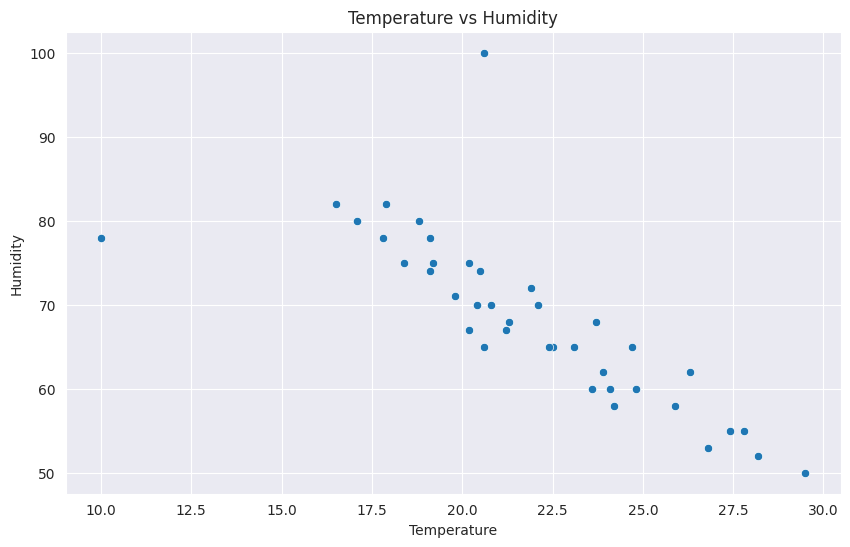

In [36]:
# Plot the data scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Humidity', data=df)
plt.title('Temperature vs Humidity')
plt.show()

In [37]:
df.describe()

,Temperature,Humidity,Airflow,Raining,Precipitation_Hail,Precipitation_No,Precipitation_Rain,Weather Condition_Clear,Weather Condition_Cloudy,Weather Condition_Light Rain,Weather Condition_Partly Cloudy,Weather Condition_Sunny
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,21.570149,68.597015,1.956716,0.223881,0.104478,0.701493,0.194030,0.134328,0.134328,0.119403,0.373134,0.238806
std,3.482468,9.335594,1.311051,0.419989,0.308188,0.461057,0.398437,0.343578,0.343578,0.326709,0.487288,0.429572
min,10.000000,50.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.100000,62.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21.200000,68.000000,1.600000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.900000,75.000000,2.450000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,29.500000,100.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
scaler = MinMaxScaler()

In [39]:
scaled_data = scaler.fit_transform(df)
scaled_data[:5]

array([[0.64102564, 0.3       , 0.10769231, 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.55384615, 0.4       , 0.04615385, 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.47179487, 0.5       , 0.15384615, 1.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        ],
       [0.72307692, 0.2       , 0.24615385, 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        ],
       [0.91282051, 0.1       , 0.35384615, 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        ]])

In [40]:
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()

,Temperature,Humidity,Airflow,Raining,Precipitation_Hail,Precipitation_No,Precipitation_Rain,Weather Condition_Clear,Weather Condition_Cloudy,Weather Condition_Light Rain,Weather Condition_Partly Cloudy,Weather Condition_Sunny
0,0.641026,0.3,0.107692,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.553846,0.4,0.046154,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.471795,0.5,0.153846,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.723077,0.2,0.246154,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.912821,0.1,0.353846,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [41]:
scaled_df.describe()

,Temperature,Humidity,Airflow,Raining,Precipitation_Hail,Precipitation_No,Precipitation_Rain,Weather Condition_Clear,Weather Condition_Cloudy,Weather Condition_Light Rain,Weather Condition_Partly Cloudy,Weather Condition_Sunny
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,0.593341,0.371940,0.224110,0.223881,0.104478,0.701493,0.194030,0.134328,0.134328,0.119403,0.373134,0.238806
std,0.178588,0.186712,0.201700,0.419989,0.308188,0.461057,0.398437,0.343578,0.343578,0.326709,0.487288,0.429572
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.466667,0.240000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.574359,0.360000,0.169231,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.712821,0.500000,0.300000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


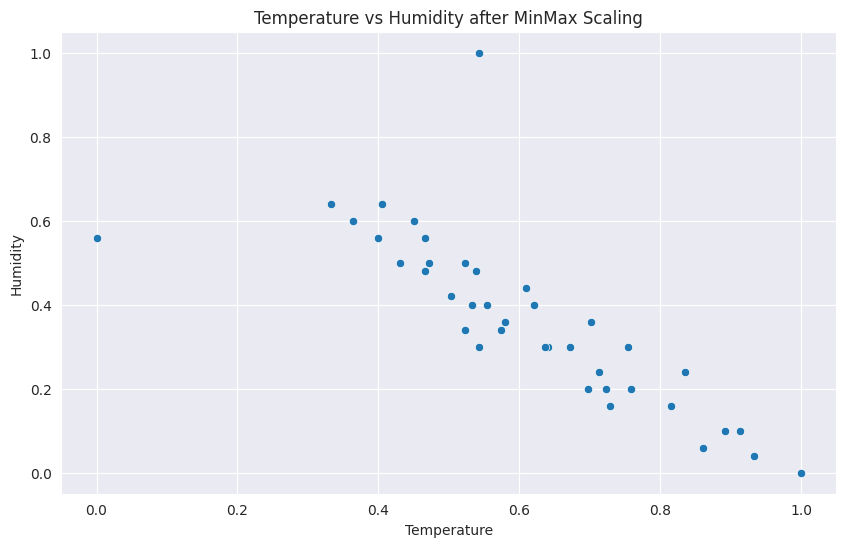

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Humidity', data=scaled_df)
plt.title('Temperature vs Humidity after MinMax Scaling')
plt.show()

## Standardization

In [43]:
# Standardization (Z-Score Normalization)
from sklearn.preprocessing import StandardScaler

In [44]:
# Load the dataset
df = pd.read_csv("data/prep-data04.csv")
df.drop('Timestamp', axis=1, inplace=True)
df.head()


,Temperature,Humidity,Airflow,Raining,Precipitation_Hail,Precipitation_No,Precipitation_Rain,Weather Condition_Clear,Weather Condition_Cloudy,Weather Condition_Light Rain,Weather Condition_Partly Cloudy,Weather Condition_Sunny
0,22.5,65,1.2,0,0,1,0,1,0,0,0,0
1,20.8,70,0.8,1,0,0,1,0,0,0,1,0
2,19.2,75,1.5,1,1,0,0,0,1,0,0,0
3,24.1,60,2.1,0,0,1,0,0,0,0,0,1
4,27.8,55,2.8,0,0,1,0,0,0,0,0,1


In [45]:
scaler = StandardScaler()

In [46]:
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()

,Temperature,Humidity,Airflow,Raining,Precipitation_Hail,Precipitation_No,Precipitation_Rain,Weather Condition_Clear,Weather Condition_Cloudy,Weather Condition_Light Rain,Weather Condition_Partly Cloudy,Weather Condition_Sunny
0,0.269024,-0.388209,-0.581539,-0.537086,-0.341565,0.652328,-0.490653,2.538591,-0.393919,-0.36823,-0.771517,-0.560112
1,-0.222820,0.151418,-0.888940,1.861899,-0.341565,-1.532971,2.038099,-0.393919,-0.393919,-0.36823,1.296148,-0.560112
2,-0.685731,0.691044,-0.350988,1.861899,2.927700,-1.532971,-0.490653,-0.393919,2.538591,-0.36823,-0.771517,-0.560112
3,0.731936,-0.927836,0.110114,-0.537086,-0.341565,0.652328,-0.490653,-0.393919,-0.393919,-0.36823,-0.771517,1.785357
4,1.802420,-1.467463,0.648066,-0.537086,-0.341565,0.652328,-0.490653,-0.393919,-0.393919,-0.36823,-0.771517,1.785357


In [47]:
scaled_df.describe()

,Temperature,Humidity,Airflow,Raining,Precipitation_Hail,Precipitation_No,Precipitation_Rain,Weather Condition_Clear,Weather Condition_Cloudy,Weather Condition_Light Rain,Weather Condition_Partly Cloudy,Weather Condition_Sunny
count,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01
mean,-2.833554e-16,3.446663e-16,-2.568426e-16,6.296787e-17,5.136853e-17,-3.314099e-17,-4.142623e-18,8.119542e-17,6.131082e-17,-3.479804e-17,1.988459e-17,1.657049e-17
std,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00
min,-3.347475e+00,-2.007089e+00,-1.119491e+00,-5.370862e-01,-3.415650e-01,-1.532971e+00,-4.906534e-01,-3.939193e-01,-3.939193e-01,-3.682298e-01,-7.715167e-01,-5.601120e-01
25%,-7.146634e-01,-7.119851e-01,-7.352397e-01,-5.370862e-01,-3.415650e-01,-1.532971e+00,-4.906534e-01,-3.939193e-01,-3.939193e-01,-3.682298e-01,-7.715167e-01,-5.601120e-01
50%,-1.070916e-01,-6.443304e-02,-2.741377e-01,-5.370862e-01,-3.415650e-01,6.523281e-01,-4.906534e-01,-3.939193e-01,-3.939193e-01,-3.682298e-01,-7.715167e-01,-5.601120e-01
75%,6.740723e-01,6.910444e-01,3.790900e-01,-5.370862e-01,-3.415650e-01,6.523281e-01,-4.906534e-01,-3.939193e-01,-3.939193e-01,-3.682298e-01,1.296148e+00,-5.601120e-01
max,2.294264e+00,3.389178e+00,3.875780e+00,1.861899e+00,2.927700e+00,6.523281e-01,2.038099e+00,2.538591e+00,2.538591e+00,2.715695e+00,1.296148e+00,1.785357e+00


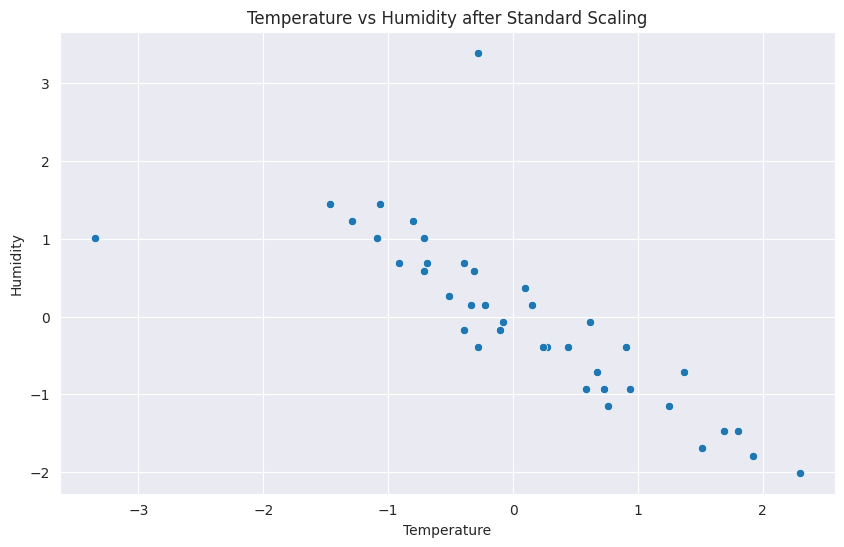

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Humidity', data=scaled_df)
plt.title('Temperature vs Humidity after Standard Scaling')
plt.show()

# Feature Engineering

In [49]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data/prep-data04.csv")
df.head()

,Timestamp,Temperature,Humidity,Airflow,Raining,Precipitation_Hail,Precipitation_No,Precipitation_Rain,Weather Condition_Clear,Weather Condition_Cloudy,Weather Condition_Light Rain,Weather Condition_Partly Cloudy,Weather Condition_Sunny
0,5/1/2023 0:00,22.5,65,1.2,0,0,1,0,1,0,0,0,0
1,5/1/2023 3:00,20.8,70,0.8,1,0,0,1,0,0,0,1,0
2,5/1/2023 6:00,19.2,75,1.5,1,1,0,0,0,1,0,0,0
3,5/1/2023 9:00,24.1,60,2.1,0,0,1,0,0,0,0,0,1
4,5/1/2023 12:00,27.8,55,2.8,0,0,1,0,0,0,0,0,1


In [50]:
# 2. Numeric Feature Engineering
# # 2.1 Binning Data

df2 = pd.DataFrame(df["Temperature"])
df2.head()
# # Method 1: .cut(), use cut when you need to segment and sort data values
# into bins.
# Cold = < 20, Normal = 20-25, Warm = 25-30, Hot > 30

,Temperature
0,22.5
1,20.8
2,19.2
3,24.1
4,27.8


In [51]:
bins = [0, 20, 25, 30, 100]
df2['TemperatureBin'] = pd.cut(df['Temperature'], bins)

labels = ["Cold", "Normal", "Warm", "Hot"]
df2 ["TemperatureLabel"] = pd.cut(df2["Temperature"], bins=bins, labels=labels)
df2.head()

,Temperature,TemperatureBin,TemperatureLabel
0,22.5,"(20, 25]",Normal
1,20.8,"(20, 25]",Normal
2,19.2,"(0, 20]",Cold
3,24.1,"(20, 25]",Normal
4,27.8,"(25, 30]",Warm


In [52]:
# # Method 2: .between() and .loc(), returns a boolean vector containing True
# wherever the corresponding Series element is between the boundary values
# left and right
df3 = pd.DataFrame(df["Temperature"])
df3.loc[df3['Temperature'].between(0, 20, 'both'), 'binned_label'] = "Cold"
df3.loc[df3['Temperature'].between(20, 25, 'right'), 'binned_label'] = "Normal"
df3.loc[df3['Temperature'].between(25, 30, 'right'), 'binned_label'] = "Warm"
df3.loc[df3['Temperature'].between(30, 100, 'right'), 'binned_label'] = "Hot"
df3.head()

,Temperature,binned_label
0,22.5,Normal
1,20.8,Normal
2,19.2,Cold
3,24.1,Normal
4,27.8,Warm


In [53]:
# # Method 3: .qcut(), Quartile-based discretization function.
df4 = pd.DataFrame(df['Temperature'])
df4['binned_label'], cut_bin = pd.qcut(df['Temperature'], q=4, labels=["Cold", "Normal", "Warm", "Hot"], retbins=True)
print("cut_bin: ", cut_bin )
print(df4.head(), '\n')

cut_bin:  [10.  19.1 21.2 23.9 29.5]
   Temperature binned_label
0         22.5         Warm
1         20.8       Normal
2         19.2       Normal
3         24.1          Hot
4         27.8          Hot 



# # Date and Time Feature Engineering

In [54]:
# 1. Load the dataset
df = pd.read_csv("data/prep-data04.csv")
df.head()

,Timestamp,Temperature,Humidity,Airflow,Raining,Precipitation_Hail,Precipitation_No,Precipitation_Rain,Weather Condition_Clear,Weather Condition_Cloudy,Weather Condition_Light Rain,Weather Condition_Partly Cloudy,Weather Condition_Sunny
0,5/1/2023 0:00,22.5,65,1.2,0,0,1,0,1,0,0,0,0
1,5/1/2023 3:00,20.8,70,0.8,1,0,0,1,0,0,0,1,0
2,5/1/2023 6:00,19.2,75,1.5,1,1,0,0,0,1,0,0,0
3,5/1/2023 9:00,24.1,60,2.1,0,0,1,0,0,0,0,0,1
4,5/1/2023 12:00,27.8,55,2.8,0,0,1,0,0,0,0,0,1


In [55]:
# 2. Date and Time Feature Engineering
# 2.1 parse Timestamp into DateTime format
df['Timestamp'] = pd.to_datetime(df.Timestamp)
df2 = pd.DataFrame(df['Timestamp'])
df2.head()

,Timestamp
0,2023-05-01 00:00:00
1,2023-05-01 03:00:00
2,2023-05-01 06:00:00
3,2023-05-01 09:00:00
4,2023-05-01 12:00:00


In [56]:
type(df2['Timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [57]:
df2

,Timestamp
0,2023-05-01 00:00:00
1,2023-05-01 03:00:00
2,2023-05-01 06:00:00
3,2023-05-01 09:00:00
4,2023-05-01 12:00:00
...,...
62,2023-05-05 00:00:00
63,2023-05-05 03:00:00
64,2023-05-05 06:00:00
65,2023-05-05 09:00:00


In [58]:
df2['Timestamp'].dt.quarter

0     2
1     2
2     2
3     2
4     2
     ..
62    2
63    2
64    2
65    2
66    2
Name: Timestamp, Length: 67, dtype: int32

In [59]:
df2['Timestamp'].dt.weekday

0     0
1     0
2     0
3     0
4     0
     ..
62    4
63    4
64    4
65    4
66    4
Name: Timestamp, Length: 67, dtype: int32

In [60]:
df2['Timestamp'].dt.time

0     00:00:00
1     03:00:00
2     06:00:00
3     09:00:00
4     12:00:00
        ...   
62    00:00:00
63    03:00:00
64    06:00:00
65    09:00:00
66    12:00:00
Name: Timestamp, Length: 67, dtype: object

In [61]:
# 2.2 extract date/quarter/week/weekday/time
df2["date"] = df2['Timestamp'].dt.date
df2['quarter'] = df2['Timestamp'].dt.quarter
df2['weekday'] = df2['Timestamp'].dt.weekday
df2['time'] = df2['Timestamp'].dt.time

df2.head()

,Timestamp,date,quarter,weekday,time
0,2023-05-01 00:00:00,2023-05-01,2,0,00:00:00
1,2023-05-01 03:00:00,2023-05-01,2,0,03:00:00
2,2023-05-01 06:00:00,2023-05-01,2,0,06:00:00
3,2023-05-01 09:00:00,2023-05-01,2,0,09:00:00
4,2023-05-01 12:00:00,2023-05-01,2,0,12:00:00


In [62]:
# 2.3 Binning time into 4 bins, [0–5], [6–11], [12–17] and [18–23].
df2['time_session'] = pd.to_datetime(df2['Timestamp'], format='%H:%M:%S')
df2.head()


,Timestamp,date,quarter,weekday,time,time_session
0,2023-05-01 00:00:00,2023-05-01,2,0,00:00:00,2023-05-01 00:00:00
1,2023-05-01 03:00:00,2023-05-01,2,0,03:00:00,2023-05-01 03:00:00
2,2023-05-01 06:00:00,2023-05-01,2,0,06:00:00,2023-05-01 06:00:00
3,2023-05-01 09:00:00,2023-05-01,2,0,09:00:00,2023-05-01 09:00:00
4,2023-05-01 12:00:00,2023-05-01,2,0,12:00:00,2023-05-01 12:00:00


In [63]:
df2['time_session'].dt.hour

0      0
1      3
2      6
3      9
4     12
      ..
62     0
63     3
64     6
65     9
66    12
Name: time_session, Length: 67, dtype: int32

In [64]:
pd.cut(df2['time_session'].dt.hour, [0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], include_lowest=True)

0       Night
1       Night
2       Night
3     Morning
4     Morning
       ...   
62      Night
63      Night
64      Night
65    Morning
66    Morning
Name: time_session, Length: 67, dtype: category
Categories (4, object): ['Night' < 'Morning' < 'Afternoon' < 'Evening']

In [65]:
time_session=pd.cut(df2['time_session'].dt.hour,
                    [0, 6, 12, 18, 24],
                    labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                    include_lowest=True)
time_session

0       Night
1       Night
2       Night
3     Morning
4     Morning
       ...   
62      Night
63      Night
64      Night
65    Morning
66    Morning
Name: time_session, Length: 67, dtype: category
Categories (4, object): ['Night' < 'Morning' < 'Afternoon' < 'Evening']

In [66]:
df2['time_session'] = time_session
df2.head()

,Timestamp,date,quarter,weekday,time,time_session
0,2023-05-01 00:00:00,2023-05-01,2,0,00:00:00,Night
1,2023-05-01 03:00:00,2023-05-01,2,0,03:00:00,Night
2,2023-05-01 06:00:00,2023-05-01,2,0,06:00:00,Night
3,2023-05-01 09:00:00,2023-05-01,2,0,09:00:00,Morning
4,2023-05-01 12:00:00,2023-05-01,2,0,12:00:00,Morning


In [67]:
## HW 03

In [68]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler

In [69]:
df = pd.read_csv('study_performance.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'study_performance.csv'

In [ ]:
df.describe(include='all')

In [ ]:
df.head()

## Feature Engineering

In [ ]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df.head()

In [ ]:
## Add your own engineered features here




## Handle Categorical columns

In [ ]:
numerical_features = df.select_dtypes(exclude="object").columns
categorical_features = df.select_dtypes(include="object").columns
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

In [ ]:
print(df['gender'].unique())
print(df['race_ethnicity'].unique())
print(df['parental_level_of_education'].unique())
print(df['lunch'].unique())
print(df['test_preparation_course'].unique())

In [ ]:
one_hot = OneHotEncoder(sparse_output=False)

In [ ]:
encoded = one_hot.fit_transform(student_data[categorical_features])
encoded

In [ ]:
one_hot.get_feature_names_out()